**Import bibliotek:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

**Importujemy bazę danych i ją wyświetlamy**

In [2]:
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


**Ustalamy zbiory danych: cechy (X) oraz gatunek (y)**

In [3]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'

X, y = penguins[features], penguins[target]

**Sprawdzamy udział procentowy dla grupy: gatunek - "Species"**

In [4]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441860
1    0.360465
2    0.197674
Name: proportion, dtype: float64

**Wniosek: mamy zbiory w których ilość gatunków nie jest równa. 44% zbioru to gatunek '0', więc dobrym pomysłem będzie stratyfikacja zbioru treningowego i testowego.**

**Sprawdzamy rozkład dla cech:**

In [5]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Generujemy wykresy pudełkowe dla naszych gatunków vs. cecha**

Unique values: 165


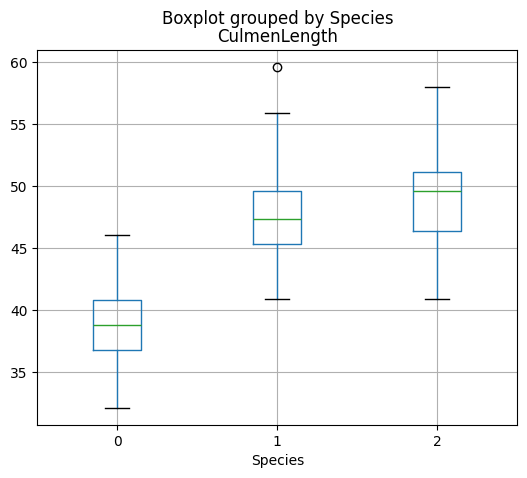

Unique values: 81


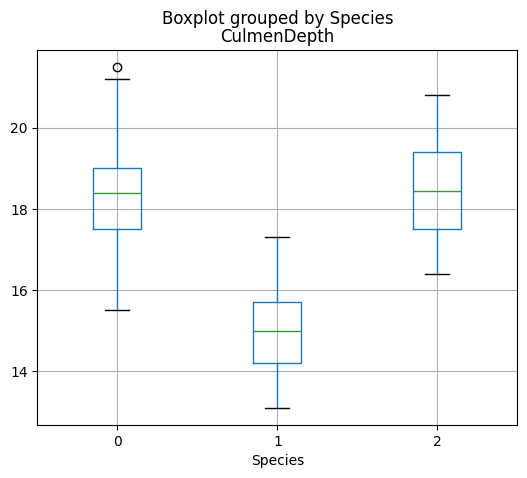

Unique values: 56


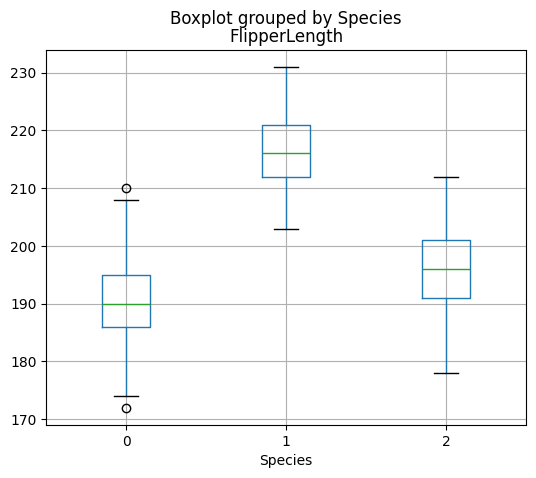

Unique values: 95


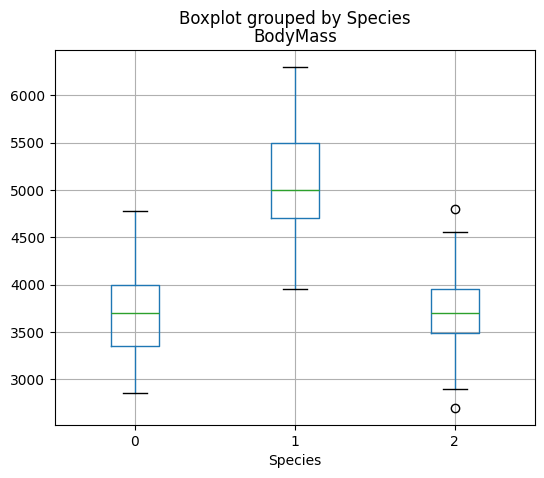

In [6]:
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

**Sprawdzamy korelacje na wykresach**

C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


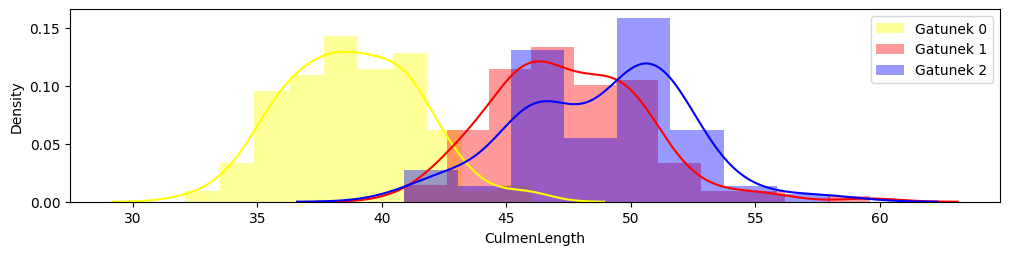

C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


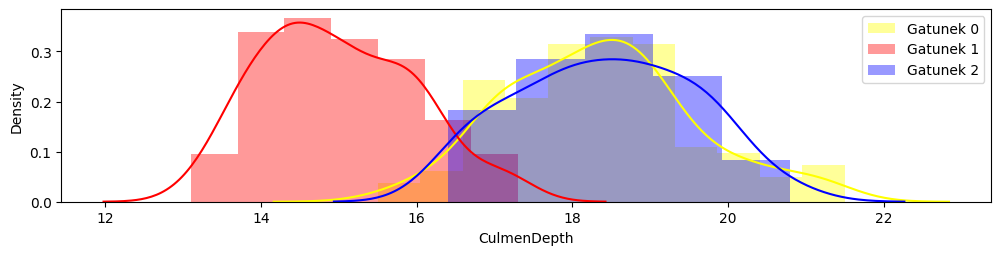

C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


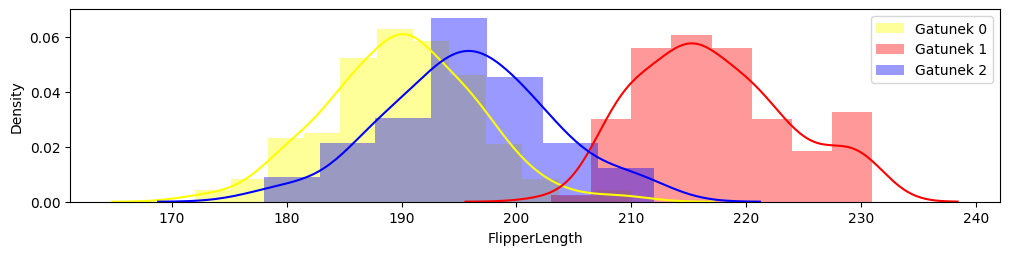

C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
C:\Users\marci\AppData\Local\Temp\ipykernel_24028\202638502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


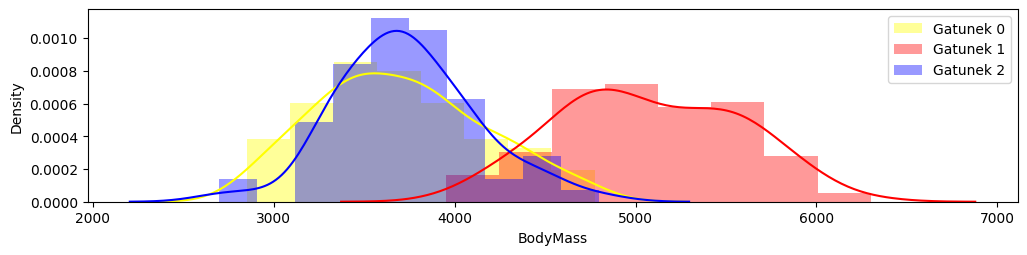

In [7]:
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(penguins.loc[penguins['Species']==0, col], kde=True, color='yellow', label='Gatunek 0')
    sns.distplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Gatunek 1')
    sns.distplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Gatunek 2')
    plt.legend(loc='upper right')
    plt.show()

**Wniosek: Oceniając powyższe wykresy, może się wydawać iż cecha 'BodyMass' koreluje z 'FlipperLength'**

**Sprawdzamy korelacje na heatmap'ie**

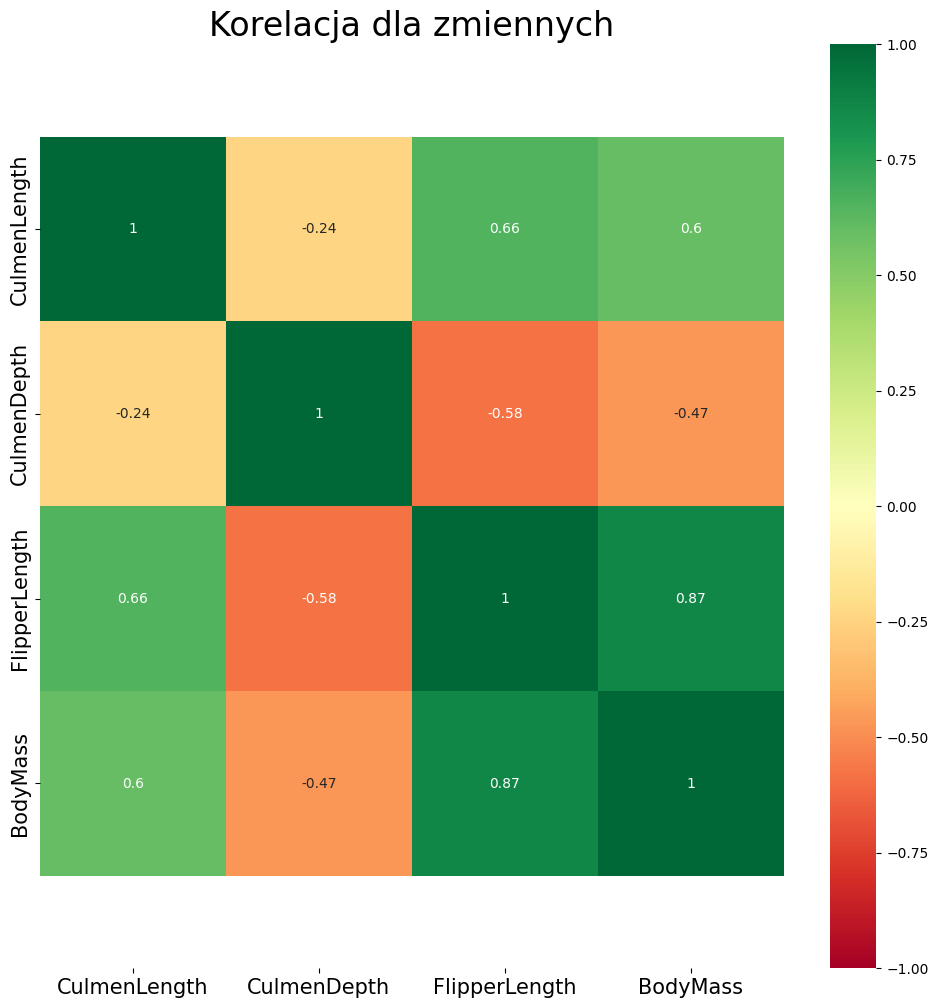

In [8]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(penguins[features].corr(),
                 xticklabels=penguins[features].corr().columns,
                 yticklabels=penguins[features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Wniosek: Powyższa heatmap'a potwierdza korelację między cechą 'BodyMass' a 'FlipperLength' na poziomie 0.87.**

**Sprawdzamy czy w zbiorze danych posiadamy braki:**

<Axes: >

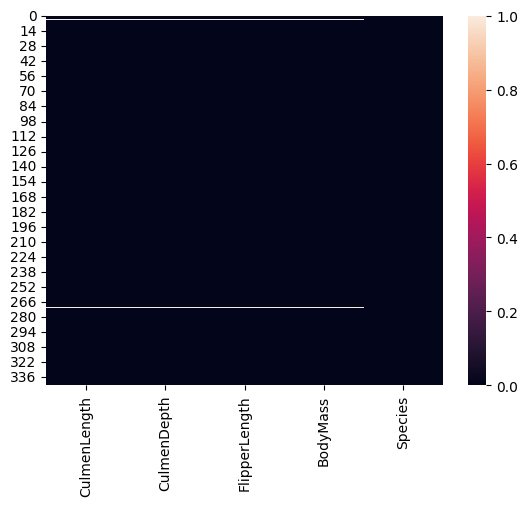

In [9]:
sns.heatmap(penguins.isnull())

**Wniosek: Powyższy wykres informuje nasz, że w zbiorach (X) istnieją braki danych**

**Ustanawiamy zbiorów treningowy i testowy - 70/30, ze stratyfikacją według gatunku (y)**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

**Tworzymy pipeline uzupełniający brak danych wartością średnią**

In [11]:
num_preparation = Pipeline(steps=[('fill_missings', SimpleImputer(strategy='mean'))])

**Tworzymy zbiór treningowy X_train_transnformed uzupełniony o wartości średnie**

In [12]:
X_train_trasnformed = num_preparation.fit_transform(X_train[features])
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=features)

**Tworzymy zbiór testowy X_test_transnformed uzupełniony o wartości średnie**

In [13]:
X_test_trasnformed = num_preparation.transform(X_test[features])
X_test_trasnformed = pd.DataFrame(X_test_trasnformed, columns=features)

**Tworzymy nowy zestaw danych treningowych i testowych po zastosowaniu standaryzacji**

In [14]:
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train_trasnformed)
X_test_standardized = scaler.transform(X_test_trasnformed)

**Tworzymy funkcję calculate_metrics:**

In [15]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    global metrics_dataframe
    models.append(model)
    models_names.append(name)

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba)

    ########## METRYKI ##########
    # Raport klasyfikacji
    print(classification_report(y_checked, predictions))

    # Macierz pomyłek
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.show()

    # F1-score (średnia ważona)
    f1_metric = f1_score(y_checked, predictions, average='weighted')

    # AUC (wieloklasowy, one-vs-rest)
    auc_metric = roc_auc_score(y_checked, predictions_proba, multi_class='ovr', average='weighted')

    # Dodaj do DataFrame
    new_row = pd.DataFrame([{
        'Model': name,
        'F1_score': round(f1_metric, 4),
        'AUC': round(auc_metric, 4)
    }])
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    # ROC Curve (dla wieloklasowego – per klasa)
    # Zamień y_checked na one-hot
    y_checked_bin = label_binarize(y_checked, classes=model.classes_)
    plt.figure(figsize=(6, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_checked_bin[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc='lower right')
    plt.show()

    return metrics_dataframe

**Tworzymy różne modele:**

In [16]:
model_LR_iter_100 = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model_LR_iter_1000 = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
model_LR_iter_10000 = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=10000)

model_knn_n_10 = KNeighborsClassifier(n_neighbors= 10)
model_knn_n_20 = KNeighborsClassifier(n_neighbors= 20)
model_knn_n_30 = KNeighborsClassifier(n_neighbors= 30)

model_tree_max_depth_2_m_sam_10 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
model_tree_max_depth_3_m_sam_20 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)
model_tree_max_depth_4_m_sam_20 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

model_svm_rbf = SVC(kernel='rbf', probability=True)
model_svm_linear = SVC(kernel='linear', probability=True)

model_forest_e_100_max_depth_3 = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)
model_forest_e_1000_max_depth_3 = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=10)
model_forest_e_1000_max_depth_4 = RandomForestClassifier(n_estimators=1000, max_depth=4, min_samples_leaf=10)

model_adaboost_decision_tree_max_depth_1_e_50 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost_decision_tree_max_depth_2_e_50 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50)
model_adaboost_decision_tree_max_depth_2_e_100 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100)

model_voting = VotingClassifier(estimators=[('Tree', model_tree_max_depth_3_m_sam_20),
                                            ('Random Forest', model_forest_e_1000_max_depth_3),
                                            ('AdaBoost', model_adaboost_decision_tree_max_depth_2_e_50)],
                                            voting='soft')

**Tworzmy listę modeli**

In [17]:
model_list=[
    ("LR_100", model_LR_iter_100),
    ("LR_1000", model_LR_iter_1000),
    ("LR_10000", model_LR_iter_10000),
    ("KNN_10", model_knn_n_10),
    ("KNN_20",    model_knn_n_20),
    ("KNN_30", model_knn_n_30),
    ("Tree_d2_s10", model_tree_max_depth_2_m_sam_10),
    ("Tree_d3_s20", model_tree_max_depth_3_m_sam_20),
    ("Tree_d4_s20", model_tree_max_depth_4_m_sam_20),
    ("SVC_rbf",    model_svm_rbf),
    ("SVC_linear",    model_svm_linear),
    ("Forest_e100_d3", model_forest_e_100_max_depth_3),
    ("Forest_e1000_d3", model_forest_e_1000_max_depth_3),
    ("Forest_e1000_d4", model_forest_e_1000_max_depth_4),
    ("Ada_tree_d1_e50", model_adaboost_decision_tree_max_depth_1_e_50),
    ("Ada_tree_d2_e50", model_adaboost_decision_tree_max_depth_2_e_50),
    ("Ada_tree_d2_e100", model_adaboost_decision_tree_max_depth_2_e_100),
    ("Voting_tree_forest_ada_soft", model_voting) 
]

**Trenujemy modele z listy oraz generujemy raport na z wykorzystaniem funkcji calculate_metrics:**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



C:\projects\Wizualizacja_danych_cz1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


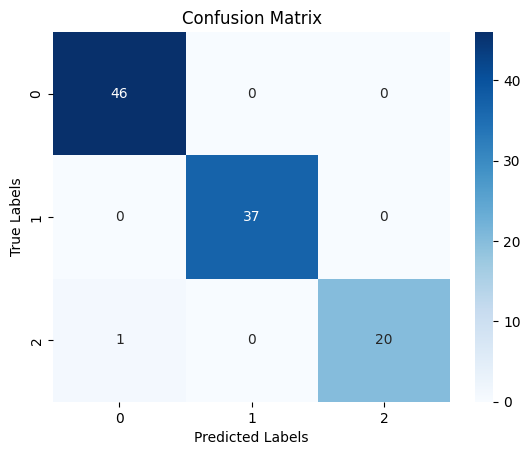

C:\Users\marci\AppData\Local\Temp\ipykernel_24028\1181285252.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


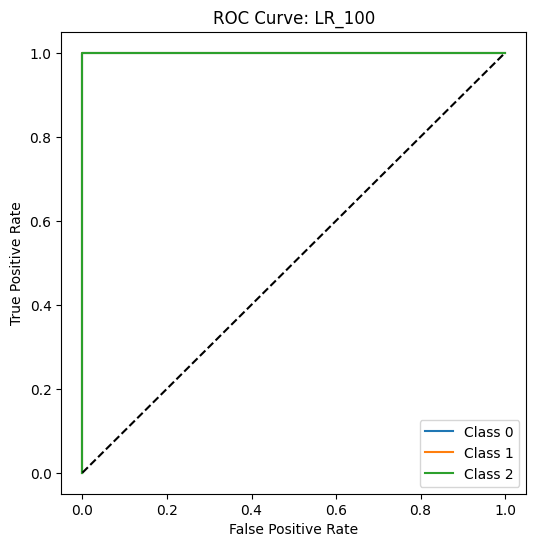

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



C:\projects\Wizualizacja_danych_cz1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


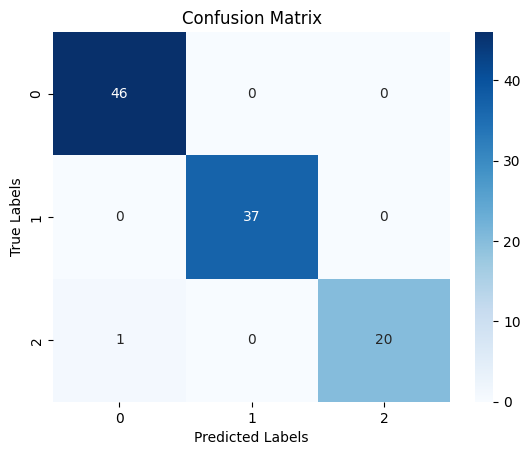

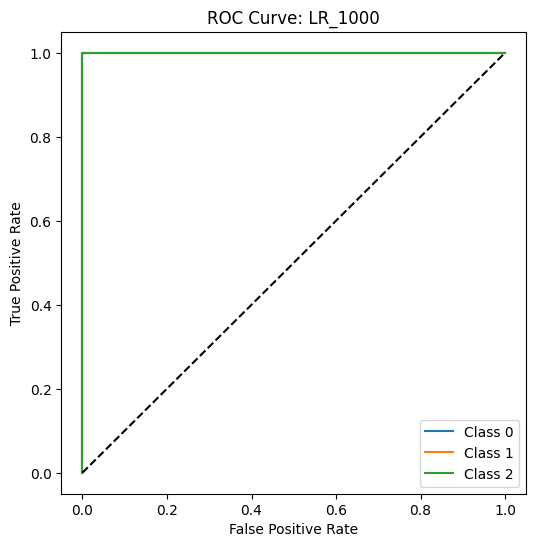

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



C:\projects\Wizualizacja_danych_cz1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


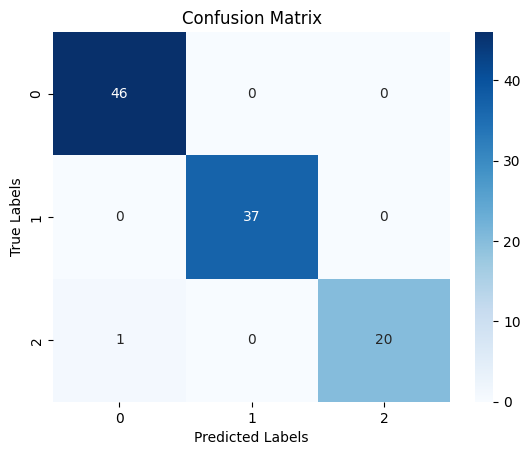

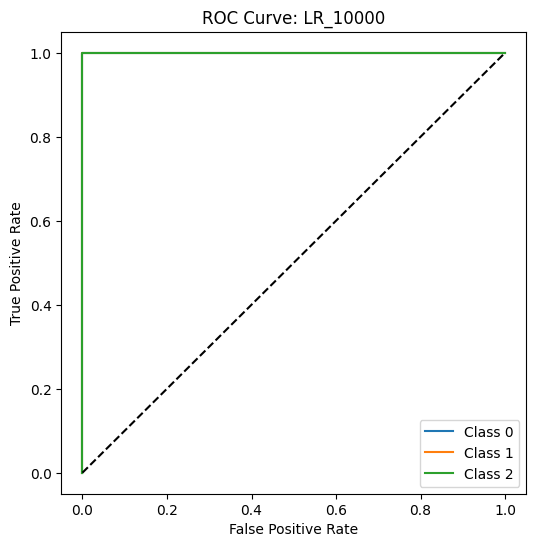

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      1.00      1.00        37
           2       1.00      0.86      0.92        21

    accuracy                           0.97       104
   macro avg       0.98      0.95      0.96       104
weighted avg       0.97      0.97      0.97       104



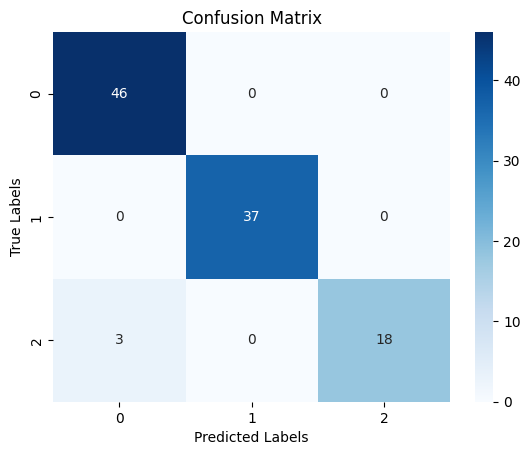

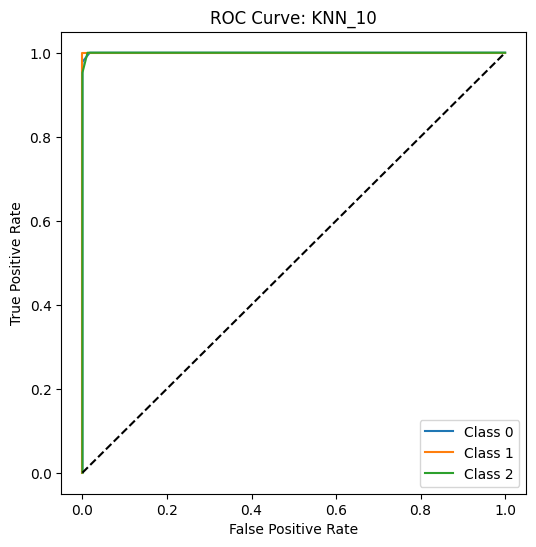

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      1.00      1.00        37
           2       1.00      0.86      0.92        21

    accuracy                           0.97       104
   macro avg       0.98      0.95      0.96       104
weighted avg       0.97      0.97      0.97       104



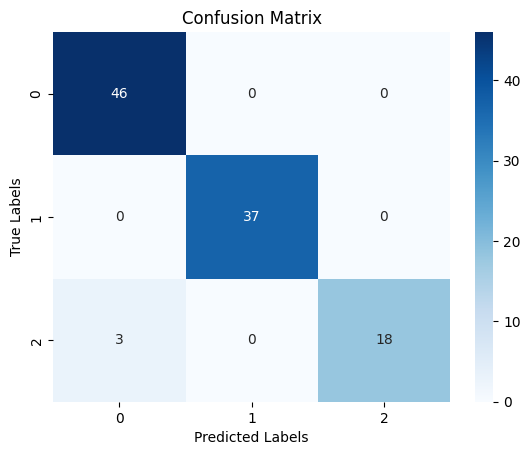

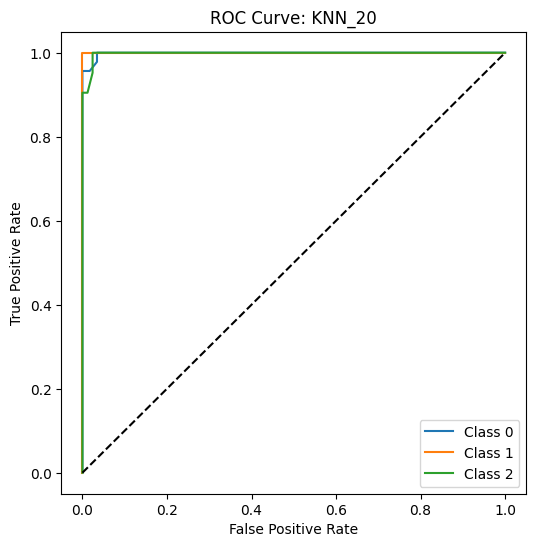

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      1.00      1.00        37
           2       1.00      0.86      0.92        21

    accuracy                           0.97       104
   macro avg       0.98      0.95      0.96       104
weighted avg       0.97      0.97      0.97       104



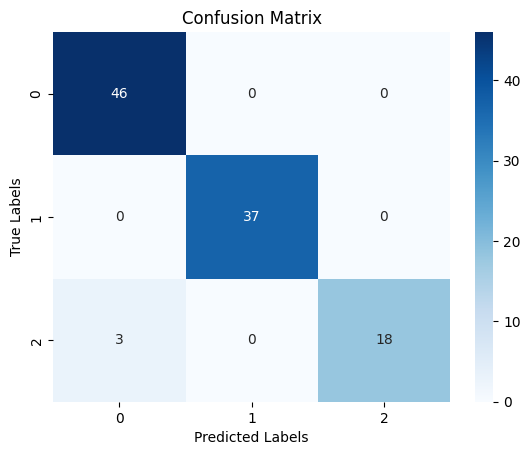

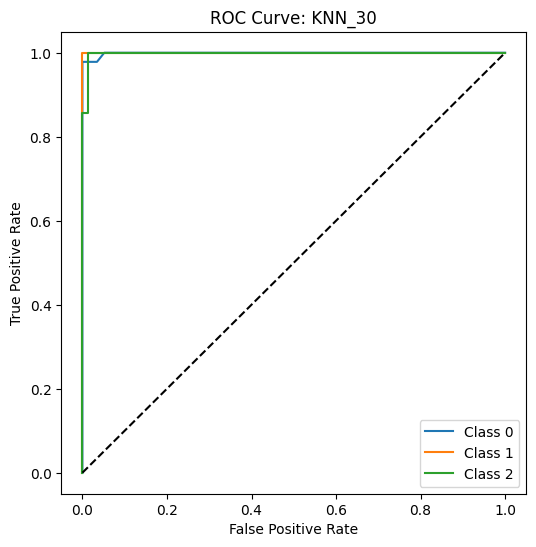

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.97      0.97        37
           2       0.89      0.81      0.85        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



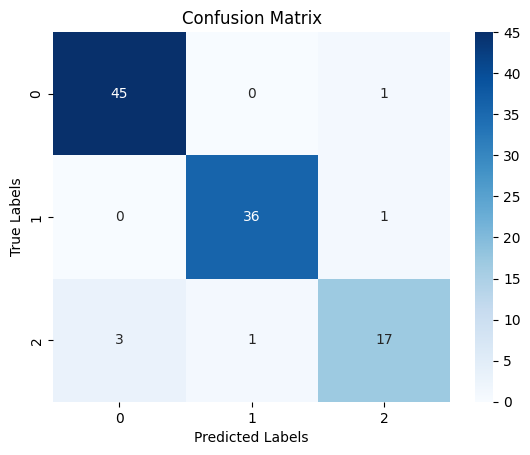

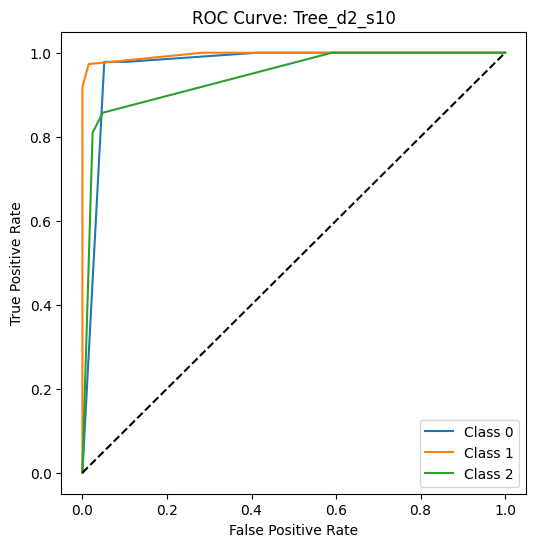

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.97      0.97        37
           2       0.89      0.81      0.85        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



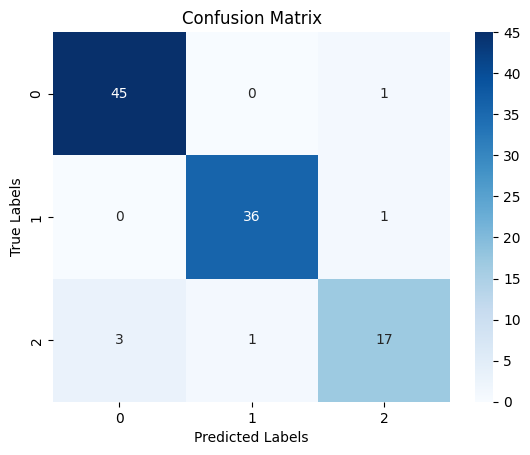

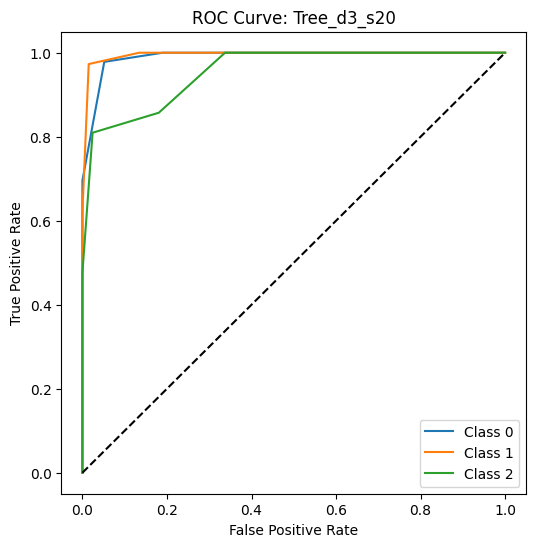

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.97      0.97        37
           2       0.89      0.81      0.85        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



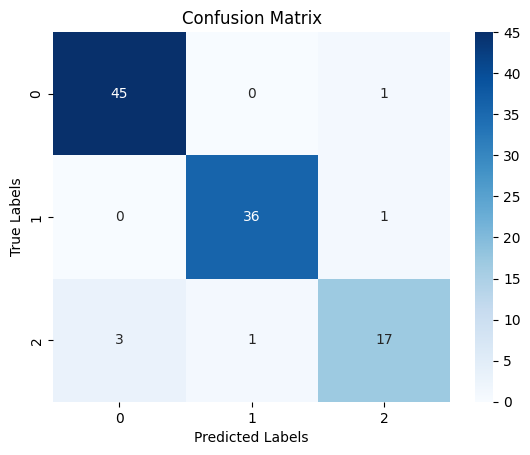

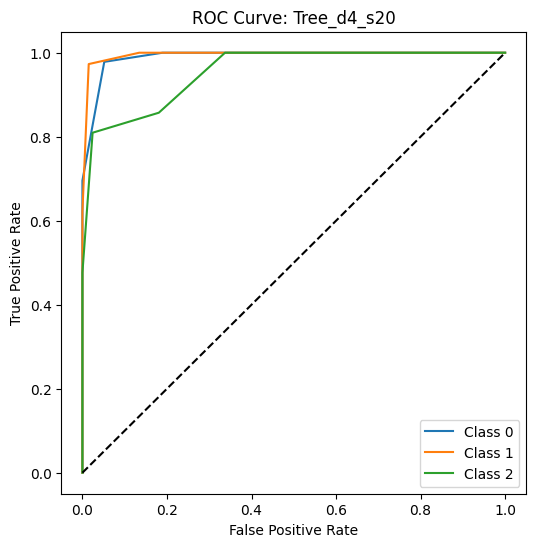

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



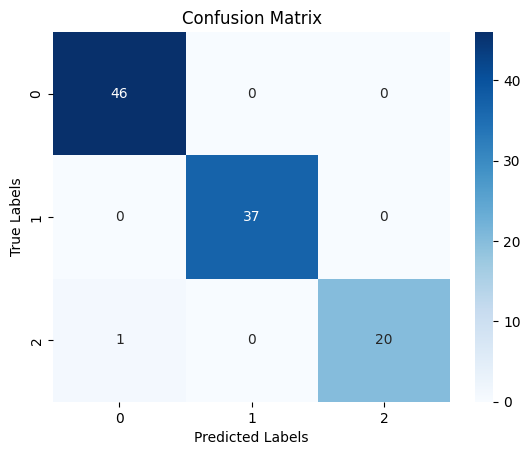

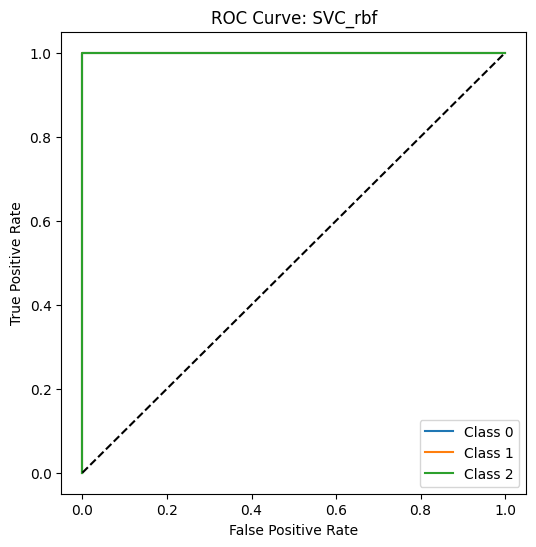

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        21

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



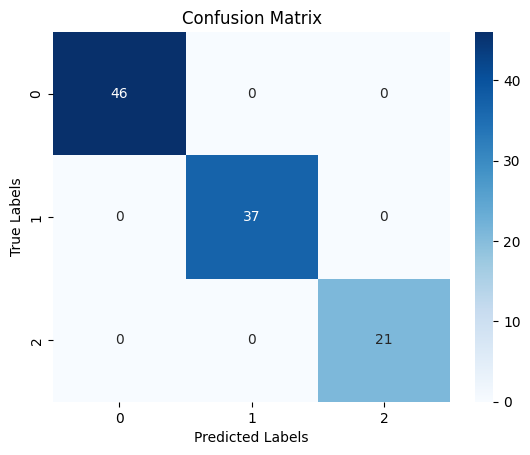

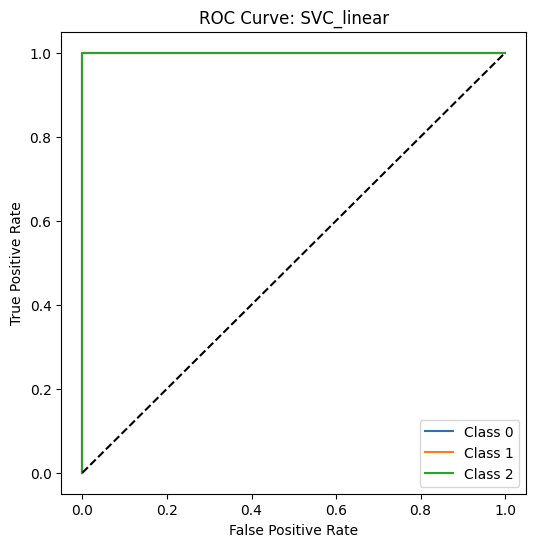

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.97      1.00      0.99        37
           2       0.90      0.90      0.90        21

    accuracy                           0.96       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.96      0.96      0.96       104



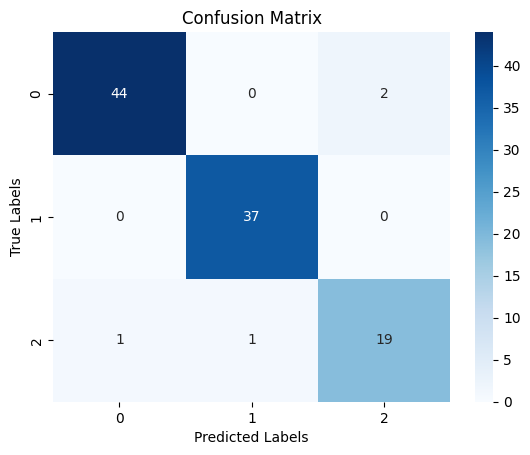

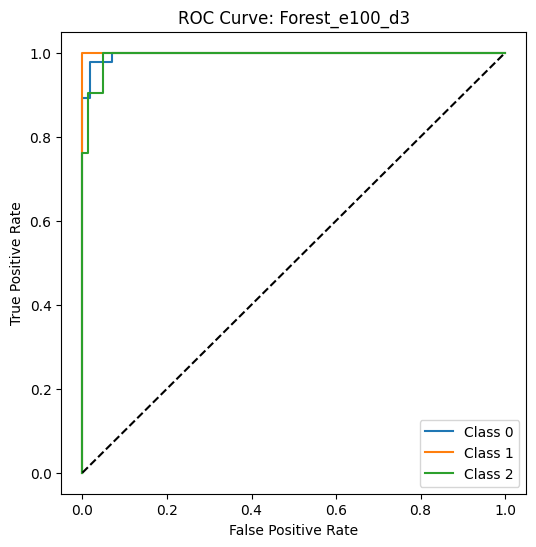

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.97      1.00      0.99        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.96      0.96      0.96       104



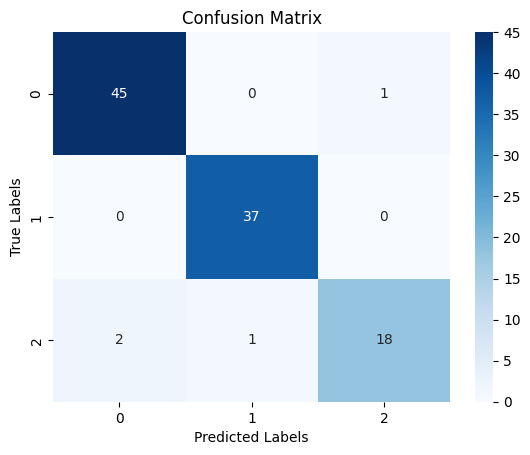

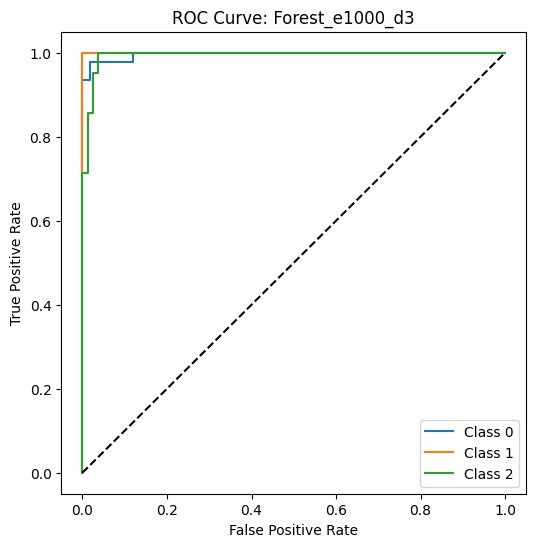

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.97      1.00      0.99        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.96       104
weighted avg       0.97      0.97      0.97       104



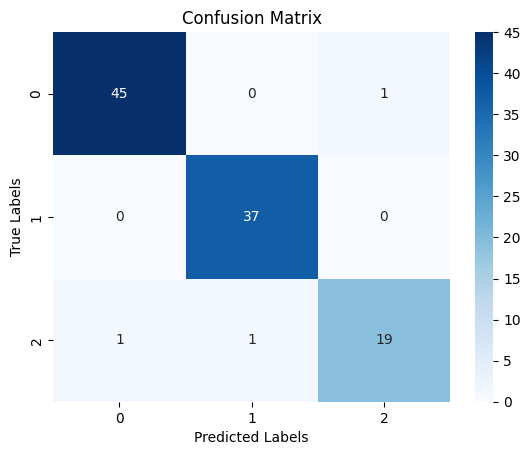

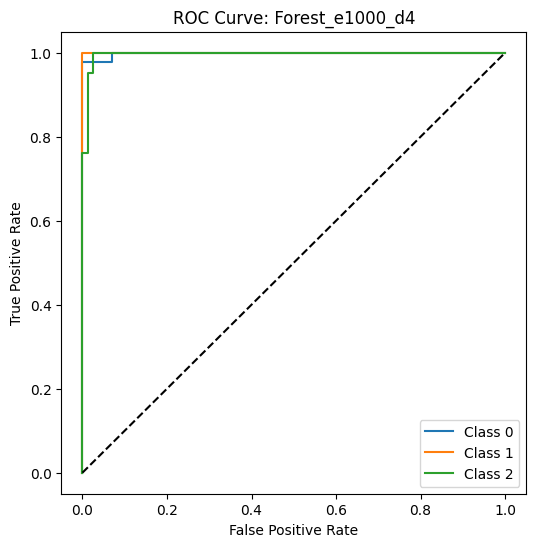

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       1.00      0.97      0.99        37
           2       0.95      0.95      0.95        21

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



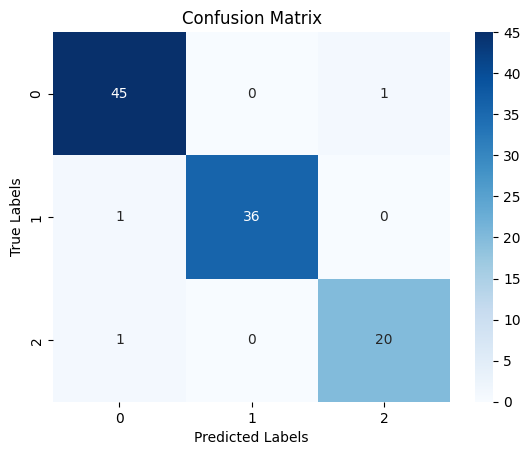

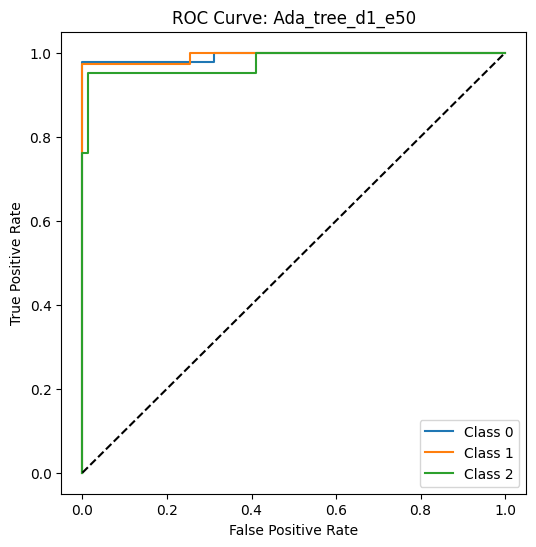

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       1.00      1.00      1.00        37
           2       0.91      0.95      0.93        21

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



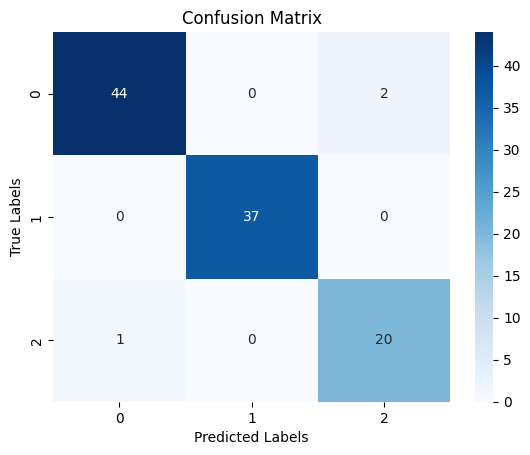

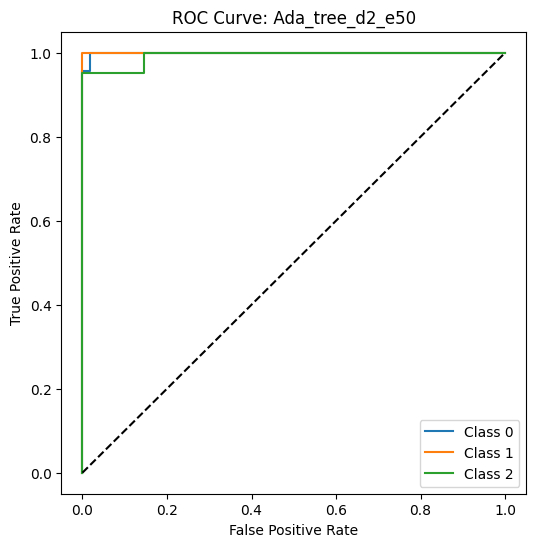

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       1.00      1.00      1.00        37
           2       0.91      0.95      0.93        21

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



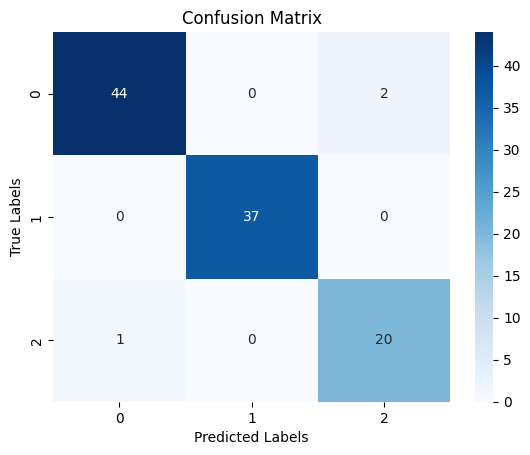

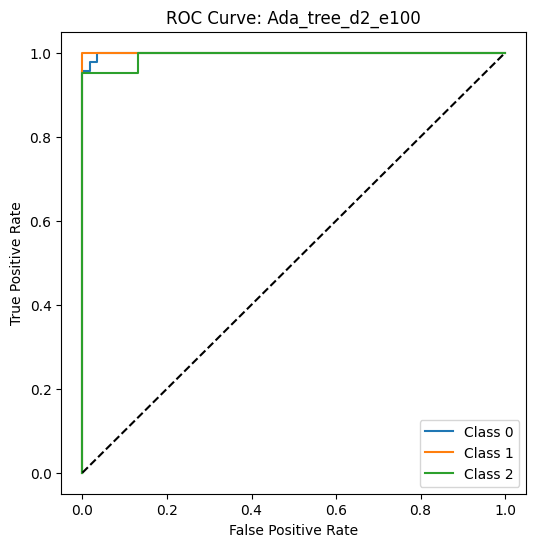

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.97      0.97      0.97        37
           2       0.89      0.81      0.85        21

    accuracy                           0.94       104
   macro avg       0.94      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104



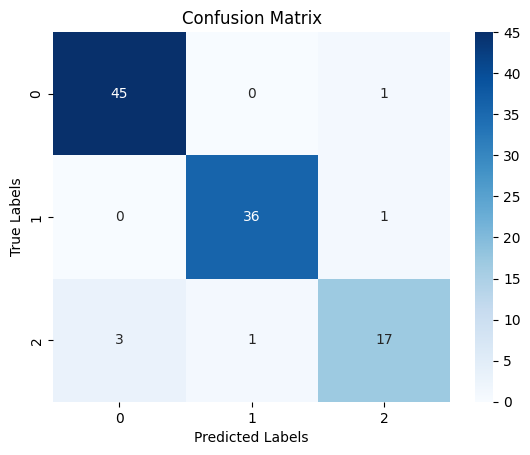

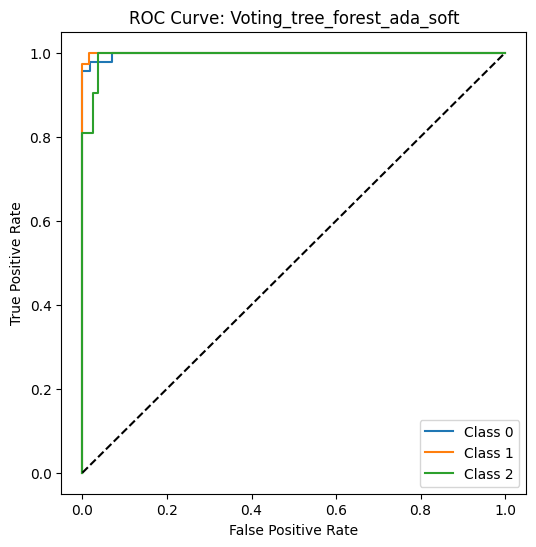

,Model,F1_score,AUC
0,LR_100,0.9903,1.0000
1,LR_1000,0.9903,1.0000
2,LR_10000,0.9903,1.0000
3,KNN_10,0.9705,0.9999
4,KNN_20,0.9705,0.9990
5,KNN_30,0.9705,0.9992
6,Tree_d2_s10,0.9413,0.9732
7,Tree_d3_s20,0.9413,0.9847
8,Tree_d4_s20,0.9413,0.9847
9,SVC_rbf,0.9903,1.0000


In [18]:
for name, model in model_list:
   model.fit(X_train_standardized,y_train)
   metrics_dataframe = calculate_metrics(model, name, X_test_standardized, y_test)   
display(metrics_dataframe)

**Wnioski:**

Wytrenowane modele na bazie wystandaryzowanych danych treningowych osiągają bardzo dobre wyniki - ponad 0,94 dla parametru F1. Tak dobre wyniki mogą świadczyć o wycieku danych lub błędu w obliczaniu metryk, nie mniej jednak uważam, że modele są po prostu dobre. Najlepszy wyniki osiągnał modele - z grupy: SVC i LogisticRegression. 